In [1]:
# Load the dataset
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("StudentPerformanceAnalysis").getOrCreate()

data_path = "student_performance_data.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Show the first few rows of the dataset
df.show()


24/07/27 20:09:52 WARN Utils: Your hostname, codespaces-c6b7cc resolves to a loopback address: 127.0.0.1; using 10.0.1.115 instead (on interface eth0)
24/07/27 20:09:52 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/07/27 20:09:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+---------+------+---+-----------------+--------------+----+-----------+-----------+-------------------------+
|StudentID|Gender|Age|StudyHoursPerWeek|AttendanceRate| GPA|      Major|PartTimeJob|ExtraCurricularActivities|
+---------+------+---+-----------------+--------------+----+-----------+-----------+-------------------------+
|        1|  Male| 24|               37|         90.75|3.47|       Arts|        Yes|                       No|
|        2|Female| 22|               37|          74.9|2.32|  Education|         No|                       No|
|        3|  Male| 22|               10|         53.36|2.38|   Business|         No|                       No|
|        4|  Male| 24|               10|         70.26|3.46|    Science|        Yes|                       No|
|        5|  Male| 18|               19|         74.87|2.31|  Education|        Yes|                       No|
|        6|Female| 20|               17|         86.01|2.47|   Business|        Yes|                       No|
|

24/07/27 20:10:08 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when

# Initialize Spark session
spark = SparkSession.builder.appName("StudentPerformanceAnalysis").getOrCreate()

# Load the dataset

data_path = "student_performance_data.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Check for missing values
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

# Drop rows with missing values
df = df.dropna()
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
df = indexer.fit(df).transform(df)
df.show()


+---------+------+---+-----------------+--------------+---+-----+-----------+-------------------------+
|StudentID|Gender|Age|StudyHoursPerWeek|AttendanceRate|GPA|Major|PartTimeJob|ExtraCurricularActivities|
+---------+------+---+-----------------+--------------+---+-----+-----------+-------------------------+
|        0|     0|  0|                0|             0|  0|    0|          0|                        0|
+---------+------+---+-----------------+--------------+---+-----+-----------+-------------------------+

+---------+------+---+-----------------+--------------+----+-----------+-----------+-------------------------+-----------+
|StudentID|Gender|Age|StudyHoursPerWeek|AttendanceRate| GPA|      Major|PartTimeJob|ExtraCurricularActivities|GenderIndex|
+---------+------+---+-----------------+--------------+----+-----------+-----------+-------------------------+-----------+
|        1|  Male| 24|               37|         90.75|3.47|       Arts|        Yes|                       No|

In [9]:
# Check the schema of the DataFrame to see the actual column names
df.printSchema()


root
 |-- StudentID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- StudyHoursPerWeek: integer (nullable = true)
 |-- AttendanceRate: double (nullable = true)
 |-- GPA: double (nullable = true)
 |-- Major: string (nullable = true)
 |-- PartTimeJob: string (nullable = true)
 |-- ExtraCurricularActivities: string (nullable = true)
 |-- GenderIndex: double (nullable = false)



In [10]:
from pyspark.sql.functions import col, count, when

# Check for missing values
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+---------+------+---+-----------------+--------------+---+-----+-----------+-------------------------+-----------+
|StudentID|Gender|Age|StudyHoursPerWeek|AttendanceRate|GPA|Major|PartTimeJob|ExtraCurricularActivities|GenderIndex|
+---------+------+---+-----------------+--------------+---+-----+-----------+-------------------------+-----------+
|        0|     0|  0|                0|             0|  0|    0|          0|                        0|          0|
+---------+------+---+-----------------+--------------+---+-----+-----------+-------------------------+-----------+



In [11]:
# Drop rows with missing values
df = df.dropna()


In [12]:
# Describe the DataFrame to get summary statistics
df.describe().show()


+-------+-----------------+------+------------------+------------------+------------------+------------------+-------+-----------+-------------------------+------------------+
|summary|        StudentID|Gender|               Age| StudyHoursPerWeek|    AttendanceRate|               GPA|  Major|PartTimeJob|ExtraCurricularActivities|       GenderIndex|
+-------+-----------------+------+------------------+------------------+------------------+------------------+-------+-----------+-------------------------+------------------+
|  count|              500|   500|               500|               500|               500|               500|    500|        500|                      500|               500|
|   mean|            250.5|  NULL|            20.956|            19.876| 74.99038000000003|2.9851599999999987|   NULL|       NULL|                     NULL|             0.488|
| stddev|144.4818327679989|  NULL|2.0005169672543515|11.471347244993952|14.565916830802095|0.5636203600123407|   NULL|  

In [13]:
# Select specific columns for descriptive statistics
df.select("StudyHoursPerWeek", "AttendanceRate", "GPA").describe().show()


+-------+------------------+------------------+------------------+
|summary| StudyHoursPerWeek|    AttendanceRate|               GPA|
+-------+------------------+------------------+------------------+
|  count|               500|               500|               500|
|   mean|            19.876| 74.99038000000003|2.9851599999999987|
| stddev|11.471347244993952|14.565916830802095|0.5636203600123407|
|    min|                 1|             50.01|               2.0|
|    max|                39|             99.97|              3.99|
+-------+------------------+------------------+------------------+



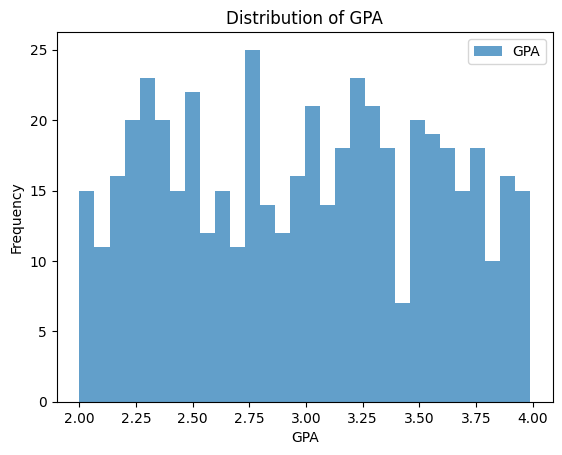

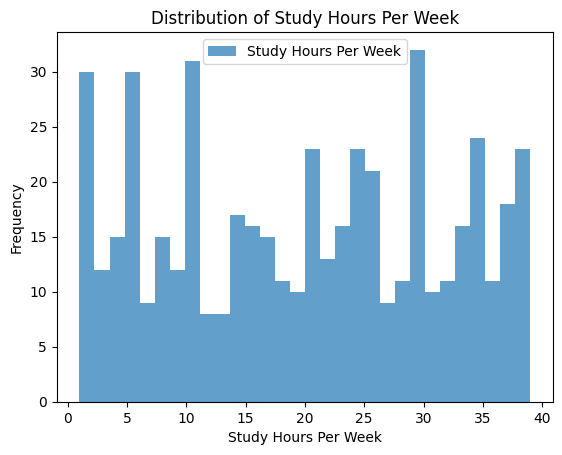

In [14]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for visualization
pandas_df = df.toPandas()

# Plot the distribution of GPA
plt.hist(pandas_df['GPA'], bins=30, alpha=0.7, label='GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('Distribution of GPA')
plt.legend()
plt.show()

# Similarly, you can plot for other numeric columns
plt.hist(pandas_df['StudyHoursPerWeek'], bins=30, alpha=0.7, label='Study Hours Per Week')
plt.xlabel('Study Hours Per Week')
plt.ylabel('Frequency')
plt.title('Distribution of Study Hours Per Week')
plt.legend()
plt.show()
